In [58]:
import pandas as pd
import os
import csv

import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

读取训练集和测试集的csv文件

In [59]:
train_data = pd.read_csv('./airfoil_noise_samples.csv')
test_data = pd.read_csv('./airfoil_noise_test.csv')
train_data.head()

,Frequency,Angle,Displacement,Chord length,Velocity,Thickness,Sound Pressure
0,2175.611424,15.138865,21.075119,0.088194,66.764401,0.044771,122.365215
1,2962.923620,13.400893,13.200889,0.048462,78.221903,0.011041,129.296236
2,4430.810843,2.164599,13.959536,0.226743,57.053201,0.011499,121.827380
3,4939.695645,13.857682,18.203793,0.021705,23.896377,0.021475,114.998132
4,2193.979785,9.298757,11.007713,0.052737,38.917034,0.001741,125.639641


定义特征和目标变量

In [60]:
X_train = train_data.iloc[:, :-1]
Y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
Y_test = test_data.iloc[:, -1]

数据归一化，防止数据过拟合

In [61]:
# #归一化
# X_train = (X_train - X_train.mean()) / X_train.std()
# X_test = (X_test - X_test.mean()) / X_test.std()
# X_train.head()

训练模型

In [62]:
model = LinearRegression()
model.fit(X_train, Y_train)

# 测试模型
Y_pred_test = model.predict(X_test)

训练结果点图

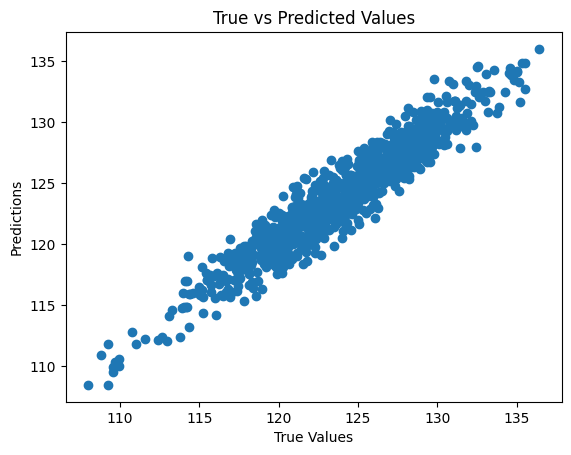

In [63]:
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

使用R^2分数和MSE来评估模型在测试集上的表现：

In [64]:
# 计算MSE和R^2评分
mse = mean_squared_error(Y_test, Y_pred_test)
r2 = r2_score(Y_test, Y_pred_test)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.9843895771191569
R^2 Score: 0.9083172459581623
